# Notebook Imports

In [70]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Gather Data
[Source: Original Research Paper](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y)

In [26]:
boston_dataset = load_boston()

In [27]:
type(boston_dataset)

sklearn.utils.Bunch

In [28]:
dir(boston_dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [125]:
print(boston_dataset.DESCR)
#print(boston_dataset.feature_names)
#print("\n", boston_dataset.target)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Explore data with Pandas Dataframes

In [40]:
# Create a pandas dataframe
data = pd.DataFrame(data = boston_dataset.data, columns = boston_dataset.feature_names)
# Add the price (target) column
data["PRICE"] = boston_dataset.target

In [51]:
data.head()
#data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [53]:
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

## Cleaning data - check for missing values

In [57]:
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Visualising Data - Histograms, Distributions and Bar Charts

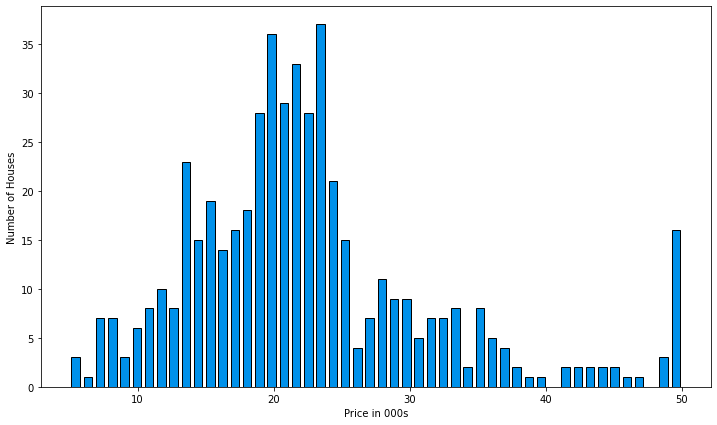

In [122]:
plt.figure(figsize = (12, 7))
plt.hist(data["PRICE"], bins = 50, ec = "black", color = "#0091ea", rwidth = 0.7)
plt.xlabel("Price in 000s")
plt.ylabel("Number of Houses")
plt.show()

In [95]:
#plt.figure(figsize = (12, 7))
#plt.ylabel("Number of Houses")
#sns.distplot(data["PRICE"], bins = 50, hist = True, kde = True, color = "#ff6d00")
#plt.show()

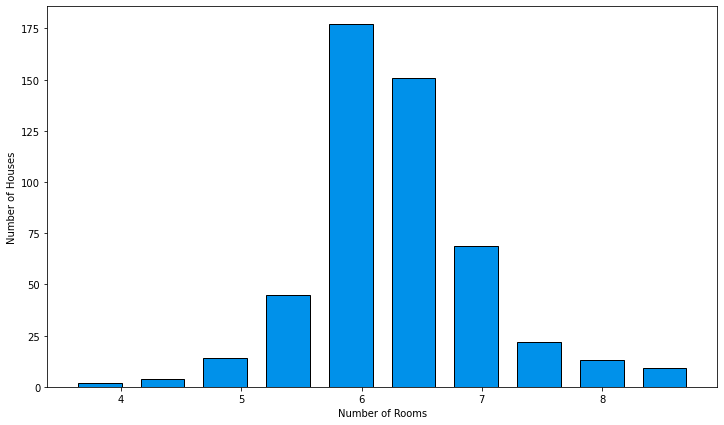

In [123]:
plt.figure(figsize = (12, 7))
plt.hist(data["RM"], bins = 10, ec = "black", color = "#0091ea", rwidth = 0.7)
plt.xlabel("Number of Rooms")
plt.ylabel("Number of Houses")
plt.show()

In [94]:
#plt.figure(figsize = (12, 7))
#plt.ylabel("Number of Houses")
#sns.distplot(data["RM"], bins = 10, hist = True, kde = True, color = "#2e7d32")
#plt.show()

In [93]:
data["RM"].mean()

6.284634387351787

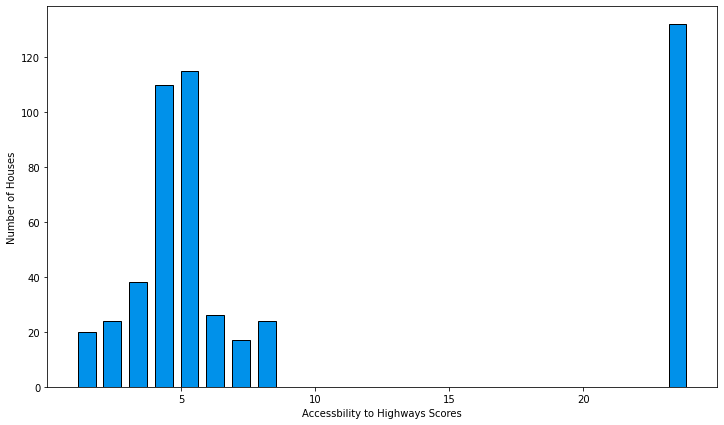

In [124]:
plt.figure(figsize = (12, 7))
plt.hist(data["RAD"], bins = 24, ec = "black", color = "#0091ea", rwidth = 0.7)
plt.xlabel("Accessbility to Highways Scores")
plt.ylabel("Number of Houses")
plt.show()

In [106]:
data["RAD"].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

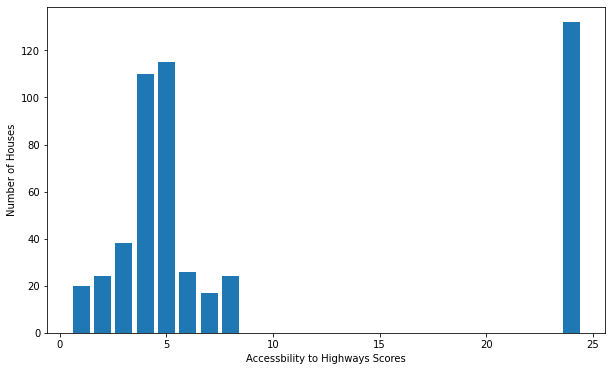

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64


In [117]:
frequency = data["RAD"].value_counts()
type(frequency)
#frequency.index
#frequency.axes[0]
plt.figure(figsize = (10, 6))
plt.xlabel("Accessbility to Highways Scores")
plt.ylabel("Number of Houses")
plt.bar(frequency.index, height = frequency)
plt.show()
print(frequency)

In [127]:
data["CHAS"].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64